In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.colors as mpl_color
from glob import glob
import numpy as np


In [2]:
filename_="mtgnwcsaf/S_NWC_CRR_MTI1_TmetWeb-NR_20251218T103000Z.nc"

In [3]:
norm = mpl_color.BoundaryNorm(np.linspace(0.5, 11.5, 12), 11)


clr = [[1.        , 1.        , 1.        ],
       [0.11764706, 0.31372549, 0.82352941],
       [0.00784314, 0.58039216, 0.99607843],
       [0.        , 0.82352941, 0.98823529],
       [0.26666667, 0.5254902 , 0.13333333],
       [0.00784314, 0.76862745, 0.01176471],
       [0.42745098, 0.9254902 , 0.00784314],
       [0.99607843, 0.99607843, 0.00784314],
       [0.99215686, 0.75686275, 0.00784314],
       [0.98823529, 0.49411765, 0.00784314],
       [1.        , 0.31372549, 0.        ],
       [0.70196078, 0.10588235, 0.14901961]]

my_cmap = ListedColormap(clr)

my_cmap.set_bad(alpha=0)


In [4]:
# open file
ds = xr.open_dataset(filename_, engine="netcdf4") 

# interested data variable
da = ds["crr"]

# Lat/Lon datasets
lat = ds["lat"]
lon = ds["lon"]

In [5]:
# boundaries: 33–45N, 23–48E
mask = (lat >= 33) & (lat <= 48) & (lon >= 23) & (lon <= 45)

# Masking
da_clip = da.where(mask, drop=True)
lat_clip = lat.where(mask, drop=True)
lon_clip = lon.where(mask, drop=True)

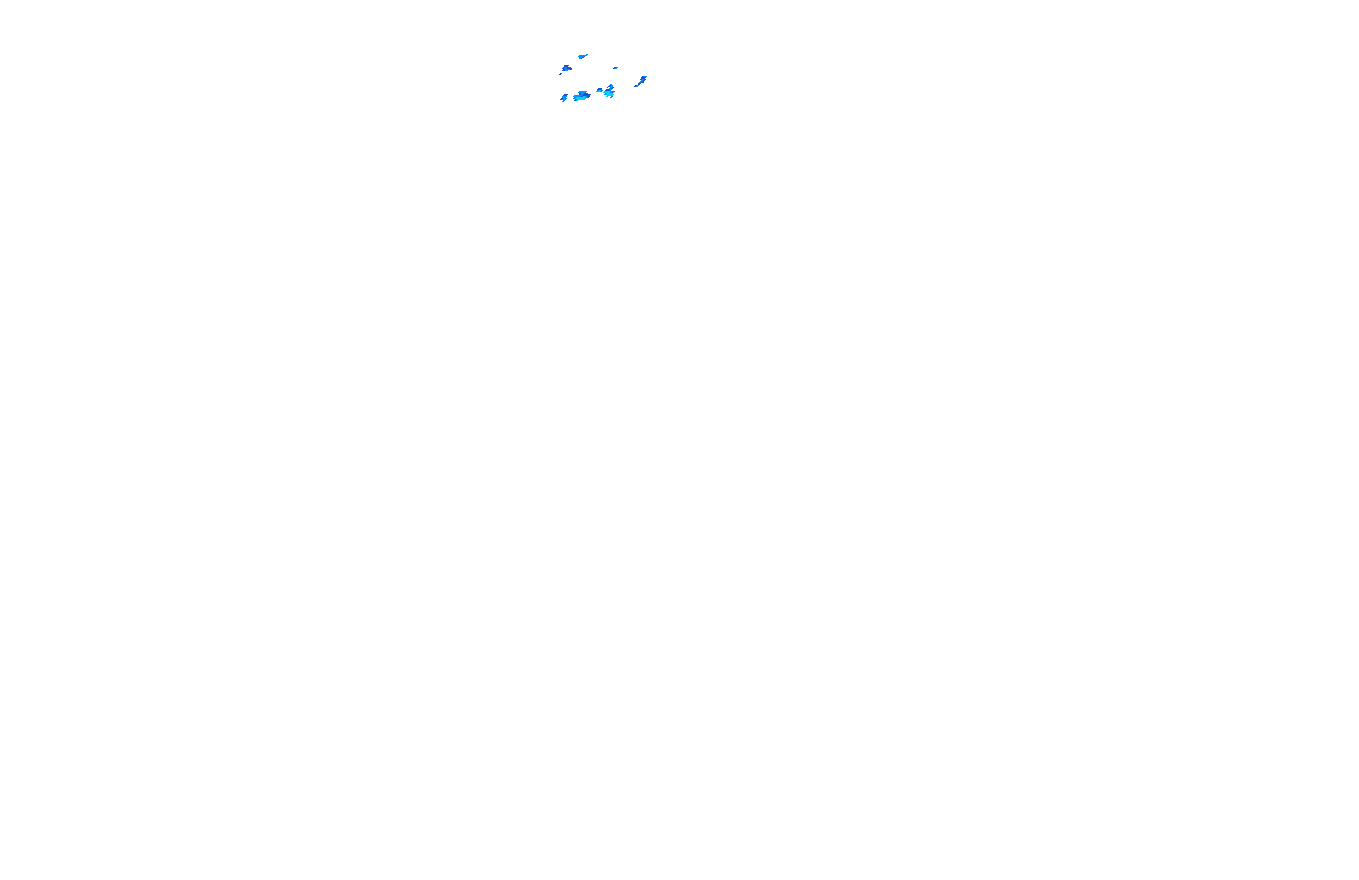

In [6]:
plt.figure(figsize=(7.8,4.98),dpi=170)
plt.pcolor(lon_clip, lat_clip, da_clip.squeeze(),norm=norm,cmap=my_cmap)
plt.axis("off")          # hem x hem y eksenini kapatır
plt.gca().set_axis_off() # eksen çizgilerini de kaldırır
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # boşlukları sıfırla
plt.savefig("crr.png",bbox_inches='tight',pad_inches = 0.,transparent=True)